In [1]:
!pip install texthero

     |████████████████████████████████| 235 kB 32.7 MB/s 
     |████████████████████████████████| 1.5 MB 20.7 MB/s 
     |████████████████████████████████| 749 kB 34.0 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats
import texthero as hero
from texthero import preprocessing as hp
import nltk
import numpy as np

In [3]:
#Plotting an histogram.
def plothisto(toPlot, xlabel,ylabel,title,bins = 50):
    plt.hist(toPlot, bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [9]:
tsla = pd.read_csv("/TSLA.csv")
display(tsla)

,PERMNO,date,RET
0,93436,20100629,C
1,93436,20100630,-0.002511
2,93436,20100701,-0.078473
3,93436,20100702,-0.125683
4,93436,20100706,-0.160938
...,...,...,...
2894,93436,20211227,0.025248
2895,93436,20211228,-0.005000
2896,93436,20211229,-0.002095
2897,93436,20211230,-0.014592


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


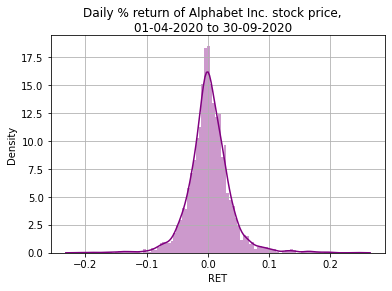

In [10]:
sns.distplot(tsla['RET'].drop(0),bins=100,color='purple')
plt.suptitle('Daily % return of Alphabet Inc. stock price,\n01-04-2020 to 30-09-2020', fontsize=12, color='black')
plt.grid(True)
plt.show()

## Since this are returns of a stock we expect the distribution to be heavy tailed
We dont have enough datapoints to show that the distribution is heavy tailes, still we can see that the mass of the distribution seems to be more concentrated in the middle and in the tail and less on the middle part!

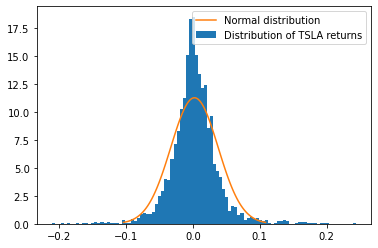

In [14]:
values = tsla['RET'].drop(0).values.astype(float)
plt.hist(values, bins=100, density = True, log = False, label = 'Distribution of TSLA returns')
mu = values.mean()
sigma = values.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'Normal distribution')
plt.legend()
plt.show()

In [15]:
df = pd.read_csv("/elonmusk.csv")

In [16]:
df['length'] = df['text'].apply(lambda text: len(text.split()))
df

,Tweet,UserScreenName,UserName,Timestamp,text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,length
0,0,Elon Musk,@elonmusk,2010-06-04T18:31:57.000Z,"Please ignore prior tweets, as that was someon...",NaN,873,648,"5,453",[],https://twitter.com/elonmusk/status/15434727182,20
1,1,Elon Musk,@elonmusk,2011-12-01T09:55:11.000Z,Went to Iceland on Sat to ride bumper cars on ...,NaN,30,24,188,['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr?...,https://twitter.com/elonmusk/status/1421799282...,27
2,2,Elon Musk,@elonmusk,2011-12-01T10:29:04.000Z,I made the volume on the Model S http://ow.ly/...,NaN,29,17,78,[],https://twitter.com/elonmusk/status/1421884581...,25
3,3,Elon Musk,@elonmusk,2011-12-03T08:20:28.000Z,"Great Voltaire quote, arguably better than Twa...",NaN,23,30,44,[],https://twitter.com/elonmusk/status/1428808713...,24
4,4,Elon Musk,@elonmusk,2011-12-03T08:22:07.000Z,That was a total non sequitur btw\n26\n14\n50,NaN,26,14,50,[],https://twitter.com/elonmusk/status/1428812840...,10
...,...,...,...,...,...,...,...,...,...,...,...,...
12201,12201,Elon Musk,@elonmusk,2022-03-03T04:25:03.000Z,Replying to \n@TheBabylonBee\n515\n464\n14.5K,🤣,515,464,14.5K,[],https://twitter.com/elonmusk/status/1499239406...,6
12202,12202,Elon Musk,@elonmusk,2022-03-03T08:13:32.000Z,Replying to \n@OwenSparks_\n @ICannot_Enough\n...,NaN,286,204,"4,003",[],https://twitter.com/elonmusk/status/1499296906...,11
12203,12203,Elon Musk,@elonmusk,2022-03-02T03:15:03.000Z,Replying to \n@DBurkland\nInvestigating\n350\n...,NaN,350,165,"5,133",[],https://twitter.com/elonmusk/status/1498859400...,7
12204,12204,Elon Musk,@elonmusk,2022-03-04T21:40:29.000Z,Replying to \n@RenataKonkoly\n @MLUKBrandenbur...,NaN,233,185,"4,191",[],https://twitter.com/elonmusk/status/1499862369...,13


In [17]:
df['day'] = pd.to_datetime(df['Timestamp'].apply(lambda date : date[0:10]))

We can see that often tweets are starting with Replying to @USER, this part of the tweet is not informative for us, and will probably be removed from the dataset.

## 2. Let's explore the distribution of lenght of tweets.

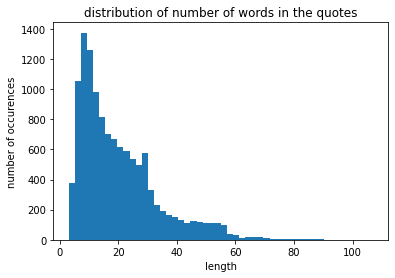

In [18]:
#Plotting an histogram of the length of the quotations in words.   
plothisto(df['length'], 'length','number of occurences','distribution of number of words in the quotes',50)

## 2. Let's explore the tweets mean lenght over time.

In [19]:
dailylen = df[['length','day']].groupby(by = 'day').mean().reset_index()
display(dailylen)

,day,length
0,2010-06-04,20.000000
1,2011-12-01,26.000000
2,2011-12-03,17.000000
3,2011-12-04,15.000000
4,2011-12-21,27.142857
...,...,...
2224,2022-02-26,11.333333
2225,2022-03-01,26.000000
2226,2022-03-02,29.428571
2227,2022-03-03,28.285714


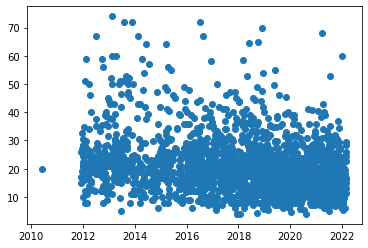

In [20]:
plt.scatter(dailylen['day'], dailylen['length']);

In [21]:
df['date_ordinal'] = pd.to_datetime(df['Timestamp']).apply(lambda date: date.toordinal())
display(df['date_ordinal'])

0        733927
1        734472
2        734472
3        734474
4        734474
          ...  
12201    738217
12202    738217
12203    738216
12204    738218
12205    738218
Name: date_ordinal, Length: 12206, dtype: int64

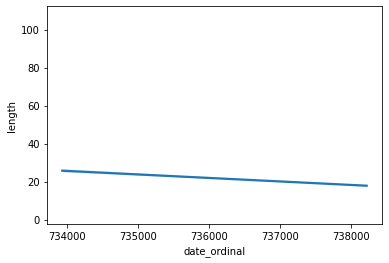

In [22]:
sns.regplot(x='date_ordinal', y='length', data=df,marker="None");

The lenght of the tweets of Elon Musk is decreasing over time!

## 2. Let's analyize the distribution of number of tweets over time.

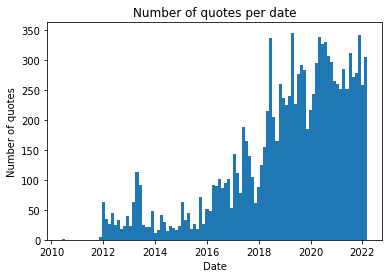

In [24]:
formatted_df = df.copy()
#change time format
formatted_df["date"] = pd.to_datetime(formatted_df['Timestamp'], format='%Y-%m-%d %H:%M:%S')

#plot the data
bins = 100
hist = plt.hist(formatted_df["date"].dt.date,bins)
plt.xlabel("Date")
plt.ylabel("Number of quotes")
plt.title("Number of quotes per date")
plt.show()

We can observe that the number of Elon Musk's tweets has increased over time

## What about the content of the tweets?
Let's check the most frequend words that are not stopwords or punctuation or verbs or tags

In [36]:
def clean(series):
    "function that cleans a quote"
    series = hp.fillna(series)
    series = hp.lowercase(series)
    series = hp.remove_digits(series)
    series = hp.remove_diacritics(series)
    series = hp.remove_stopwords(series)
    series = hp.remove_whitespace(series)
    series = hp.remove_punctuation(series)
    return series

def remove_verbs(series):
    """ function that removes all verbs from a series of sentences (series in the sense of pandas)"""
    def remove_verbs_from_sentence(sentence):
        """ function that removes all verbs from a sentence"""
        #tokenizes the sentence (makes it become a list of words)
        tokens = nltk.word_tokenize(sentence)

        #tags words, for example if the word is a verb in it's base form then it tags it with 'VB'
        #tagged becomes a list of tuples with (verb,tag) as format
        tagged = nltk.pos_tag(tokens)

        #filter all verbs from list
        tagged =list(filter(lambda x: x[1] not in  ['VB','VBD','VBG','VBN','VBP','VBZ','MD'],tagged))
 
        #remove tags from words
        words = list(map(lambda x: x[0], tagged))

        #join the words to have a sentence once againg
        sentence = ' '.join(words)
        return sentence

    return series.apply(remove_verbs_from_sentence)


# ## arguments:
#     ## dataframe: dataframe containing quotes, the data frame must have at least 2 columns: 'party_label' and ' quotation'
#     ## keyword: only used if use_keyword = True, allows us to do analysis with only quotes that include the keyword
#     ## use_keyword: specifies if we must use the keyword to to do analysis with only quotes that include the keyword
#     ##removeVerbs: if set to true, we remove all verbs from the quotes
# def pca(dataframe,keyword = None, use_keyword = False,removeVerbs = False):
#     """ function that performs pca on quote and plots their position with respect to the 2 most meaningful vectors """


#     df = dataframe.copy()
#     #clean quote
#     df['quotation'] = clean(df['quotation'])

#     if use_keyword:
#         #extract only quotes that include keyword
#         df = df[df['quotation'].str.contains(keyword)]
#         #remove keyword from quotes
#         df['quotation'] = df['quotation'].apply(lambda x: x.replace(keyword, ''))

#     if removeVerbs:
#         #remove verbs from quotes
#         df['quotation'] = remove_verbs(df['quotation'])

#     #vectorization of the sentences
#     df['tfidf'] = hero.tfidf(df['quotation'])
#     #perform pca
#     df['pca'] = hero.pca(df['tfidf'])
#     #plot
#     hero.scatterplot(
#         df, 
#         col='pca', 
#         color='party_label', 
#         title="PCA for quotes" + ("containing word " + keyword) if use_keyword else '',
#         hover_data = ['quotation','speaker']
#     )
#     df = df.drop(columns = ['tfidf'])

In [ ]:
# ## arguments:
#     ## dataframe: dataframe containing quotes, the data frame must have at least 2 columns: 'party_label' and ' quotation'
#     ## keyword: only used if use_keyword = True, allows us to do analysis with only quotes that include the keyword
#     ## use_keyword: specifies if we must use the keyword to to do analysis with only quotes that include the keyword
#     ##removeVerbs: if set to true, we remove all verbs from the quotes
#     ## top: the number of trending words that will be shown on plot 
# def trending_words(dataframe, keyword = None, use_keyword = False, removeVerbs = False,show_biggest_deltas = False ,top = 20):
#     """ function that plots on a bar plot the top trending words for every political party and compares it to the other partie's statistics """

#     def compute_relative_proportion(pos_party, party_label, proportion):
#         if pos_party != party_label:
#             return -proportion
#         else:
#             return proportion

#     df = dataframe.copy()

#     if use_keyword:
#         #keep only quotes that contain the keyword
#         df = df[df['quotation'].str.contains(keyword)]

#     ##clean the data, (removing stop words etc..)
#     df['quotation'] = clean(df['quotation'])

#     if removeVerbs:
#         #remove verbs from quotes
#         df['quotation'] = remove_verbs(df['quotation'])

#     ##count the top words per partylabel
#     word_count = df.groupby('party_label')['quotation'].apply(hero.visualization.top_words)
    
    

#     #rename columns
#     word_count = word_count.reset_index().rename(columns = {'level_1': 'word', 'quotation': 'proportion'})
    
#     word_count['proportion'] = word_count.groupby('party_label')['proportion'].apply(lambda x: x / float(x.sum()))

#     #plot top trending words per party
#     for party in word_count['party_label'].unique():

#         if use_keyword:
#             #drop keyword in the word frequencies
#             party_top_words = word_count[word_count['word'] != keyword]

#         else:
#             party_top_words = word_count
        
#         if show_biggest_deltas:
#             #if party_label != party make the relative_proportion = -proportion otherwise make relative_proportion = proportion
#             word_count['proportion'] = word_count.apply(lambda x: compute_relative_proportion(party, x['party_label'], x['proportion']),axis = 1)

#             diff_table = word_count.groupby('word')['proportion'].apply(lambda x: sum(x)).reset_index()
#             #sort word frequency in decreasing order
#             party_top_words = diff_table.sort_values(by = 'proportion', ascending = False)
#             word_count['proportion'] = word_count['proportion'].apply(lambda x: -x if x < 0 else x)
            
            

#         else:
#             #sort word frequency in decreasing order
#             party_top_words = word_count[word_count['party_label'] == party].sort_values(by = 'proportion', ascending = False)
            

#         ##get only the 'top' most frequent words
#         party_top_words = party_top_words['word'].head(top)
#         ##extract counts of the top trending words
#         df_with_party_top_words = word_count[word_count['word'].isin(party_top_words)]
        
#         #plot
#         sns.barplot(data = df_with_party_top_words, y='word', x='proportion', hue='party_label').set_title('top trending words for ' + party + ' party')
#         plt.show()

In [ ]:
#trending_words(df, keyword = None, use_keyword = False,removeVerbs = True,show_biggest_deltas = True,top = 20)

In [26]:
text = df['text']

In [27]:
cleanedtxt = clean(text)

In [39]:
nltk.download()
cleanedtxtNoVerbs = remove_verbs(cleanedtxt)

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> averaged_perceptron_tagger


        /root/nltk_data...
      Unzipping taggers/averaged_perceptron_tagger.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [57]:
hero.top_words(cleanedtxtNoVerbs)[:20]

'                 1985
tesla             1967
com                902
others             874
spacex             750
elonmusk           687
...                676
model              534
good               494
1k                 487
8k                 473
5k                 463
yes                460
4k                 460
9k                 458
7k                 430
6k                 425
3k                 424
erdayastronaut     419
like               412
Name: text, dtype: int64

We see that many words present are still some wird punctuation that needs to be removed to see the real most frequent words. We see that mosto of the content is related to elon musk in general (spacex,elonmusk...) but we are happy to remark that the first, most frequent significant word is TESLA!

In [49]:
import string
cleanedtxtNoVerbs.apply(lambda text: text.translate(str.maketrans('','',string.punctuation)))

0                     please prior tweets someone actually
1        iceland ride bumper cars ice country vlad van ...
2        volume model http ow ly mtd7 need work miniatu...
3        great voltaire quote arguably better twain new...
4                                   total non sequitur btw
                               ...                        
12201                                     thebabylonbee 5k
12202                     owensparks icannot enough others
12203                                            dburkland
12204            renatakonkoly mlukbrandenburg others sure
12205    mlukbrandenburg gigafactory 4 others ich mocht...
Name: text, Length: 12206, dtype: object

In [51]:
for sentence in cleanedtxtNoVerbs.values:
  print(sentence)

Output streaming troncato alle ultime 5000 righe.
oyvi00i good tho
j brorsson teslarati hopefully march checking ...
foxfire 1st definitely ' sky city thing prequel even sequel
evelyn janeidy twittersupport note twitter clarify spacex videos us rights bowie song falcon heavy launch
janeidyeve jakethehuman28 others spacex videos definitely infringement
leehudson lockheedmartin competitor drone fighter plane ' remote human maneuvers autonomy f chance
bryr32 wrong settings welds super flat strong ' building heavy duty custom planisher right settings major improvement
archillect obv
justpaulinelol sn2
flcnhvy yes
nichegamer bgii amazing
dogs 7k 8k
mad respect makers things 9k 1k
bernie ' tax rate high 1k
sn2 dome high bay 6k
annerajb realemirhan yes dramatically imo
teslarati matter production system rocket design relatively easy one hard many extremely hard manufacturing
sofiaan tesla true oddly ' actually order fsd perhaps ' aware computer free fsd option even delivery
janeidyeve ' puck 

In [53]:
import regex as re
cleanedtxtNoVerbs.apply(lambda text: re.sub('[^A-Za-z0-9]+', ' ', text))

0                     please prior tweets someone actually
1        iceland ride bumper cars ice country vlad van ...
2        volume model http ow ly mtd7 need work miniatu...
3        great voltaire quote arguably better twain new...
4                                   total non sequitur btw
                               ...                        
12201                                     thebabylonbee 5k
12202                     owensparks icannot enough others
12203                                            dburkland
12204            renatakonkoly mlukbrandenburg others sure
12205    mlukbrandenburg gigafactory 4 others ich mocht...
Name: text, Length: 12206, dtype: object